### Import the necessary libraries 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules



<span style="color: black;">Importing the data</span>


In [2]:
df = pd.read_csv("/home/owekitiibwa/Desktop/dataAnalysis/Pandas-Data-Science-Tasks/all_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


Data Cleaning

Count missing values for each column and sort in descending order

In [3]:

missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

Deleting missing values from the dataset

In [4]:
df = df.dropna()
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Checking for duplicates and delete them


In [5]:
# Use the `duplicated` method to check for duplicate rows
duplicates = df[df.duplicated()]
df = df.drop_duplicates()
#Checking whether duplicates have been removed
duplicates = df[df.duplicated()]
duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Plotting the item distribution

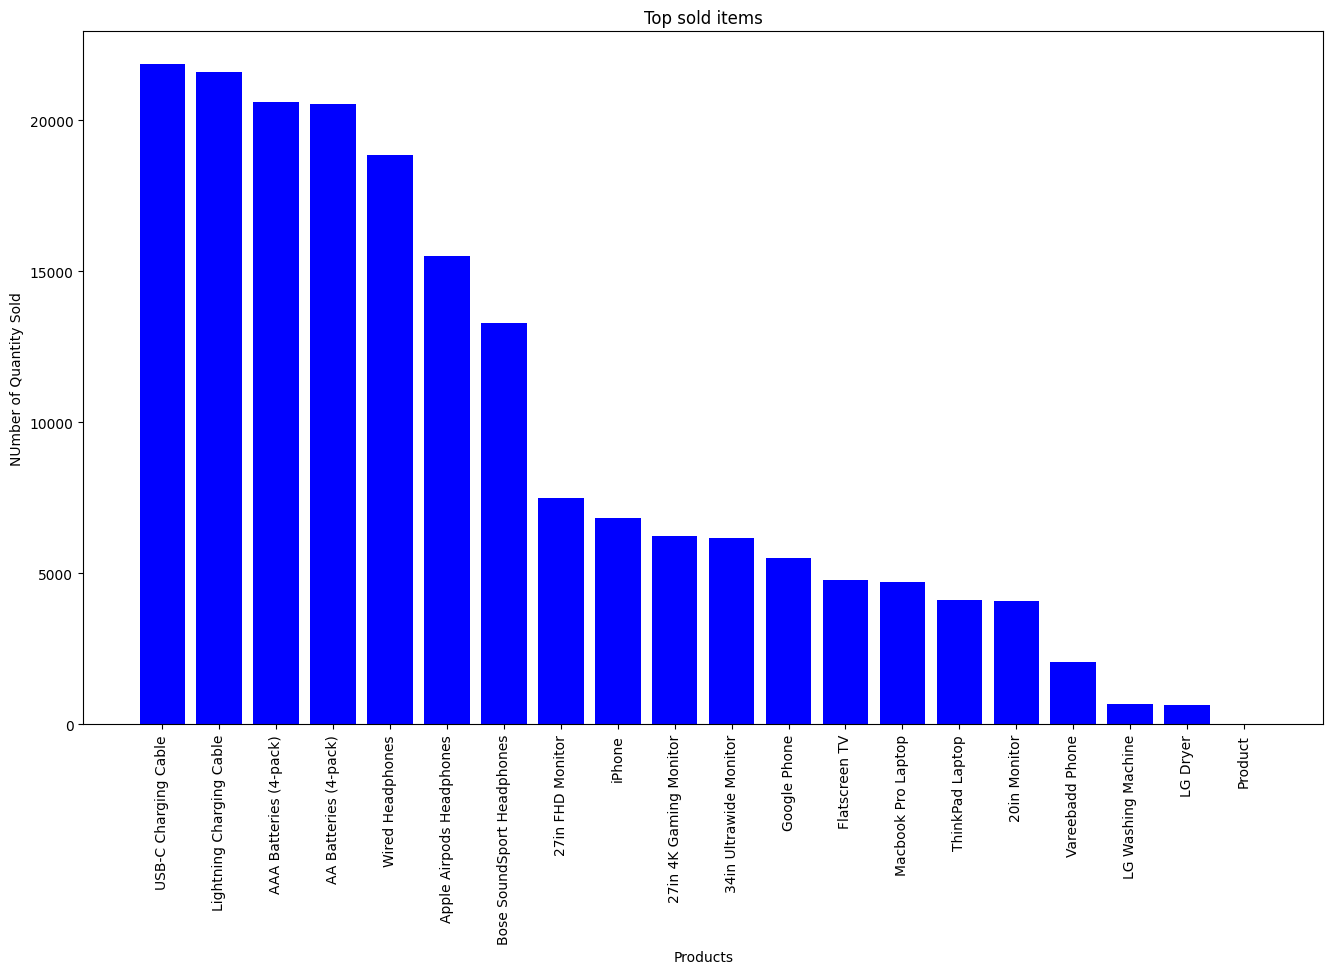

In [6]:
Itemdistro = df.groupby(by= "Product").size().reset_index(name= 'Frequency').sort_values(by="Frequency",ascending=False)
bars = Itemdistro['Product']
height = Itemdistro['Frequency']
x_pos = np.arange(len(bars))

plt.figure(figsize=(16,9))
plt.bar(x_pos,height,color="blue")
plt.title("Top sold items")
plt.xlabel("Products")
plt.ylabel("NUmber of Quantity Sold")
plt.xticks(x_pos, bars, rotation=90)

plt.show()

Lets us create a chart showing trends the products ordered

/tmp/ipykernel_258289/1884926306.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Products Ordered')]

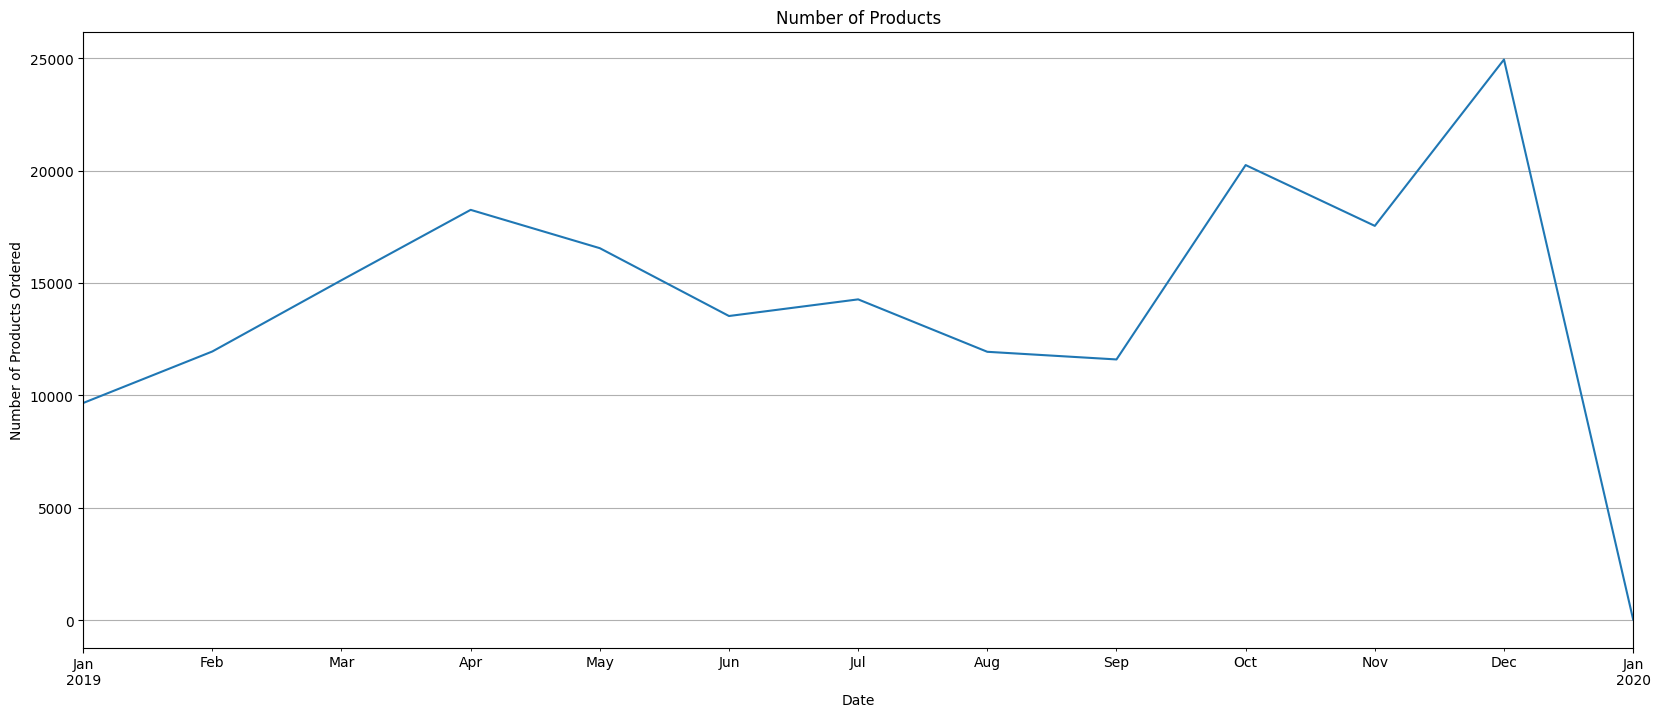

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df_date = df.set_index(df["Order Date"])
df_date.resample('M')["Product"].count().plot(figsize = (20,8),grid= True,title="Number of Products").set(xlabel="Date",ylabel="Number of Products Ordered")

Now, let’s pivot this table to convert the items into columns and the transaction into rows:

In [11]:

df2 = pd.crosstab(df['Order ID'], df['Product'])
df2.head()


Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order ID,,,,,,,,,,,,,,,,,,,
141275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
141290,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
141365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
141384,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
141450,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


Now lets encode the data for the Apriori Algorithm

In [12]:
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
    
basket_input = df2.applymap(encode)

/tmp/ipykernel_258289/230850535.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_input = df2.applymap(encode)


 Build the Apriori Algorithm for Market Basket Analysis

In [16]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets = apriori(basket_input, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)

/home/owekitiibwa/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
57,(Lightning Charging Cable),(iPhone),0.251199,0.270970,0.146969,0.585069,2.159170,0.078902,1.756994,0.716959
56,(iPhone),(Lightning Charging Cable),0.270970,0.251199,0.146969,0.542382,2.159170,0.078902,1.636301,0.736401
53,(Google Phone),(USB-C Charging Cable),0.237389,0.293793,0.144934,0.610533,2.078107,0.075191,1.813265,0.680285
52,(USB-C Charging Cable),(Google Phone),0.293793,0.237389,0.144934,0.493320,2.078107,0.075191,1.505114,0.734618
62,(Wired Headphones),(iPhone),0.233610,0.270970,0.067161,0.287492,1.060976,0.003860,1.023189,0.074990
63,(iPhone),(Wired Headphones),0.270970,0.233610,0.067161,0.247854,1.060976,0.003860,1.018939,0.078833
54,(Wired Headphones),(Google Phone),0.233610,0.237389,0.061346,0.262601,1.106205,0.005890,1.034190,0.125274
55,(Google Phone),(Wired Headphones),0.237389,0.233610,0.061346,0.258420,1.106205,0.005890,1.033456,0.125895
47,(Apple Airpods Headphones),(iPhone),0.134613,0.270970,0.054223,0.402808,1.486542,0.017747,1.220763,0.378210
46,(iPhone),(Apple Airpods Headphones),0.270970,0.134613,0.054223,0.200107,1.486542,0.017747,1.081879,0.448950


Support vs. Confidence Scatter Plot

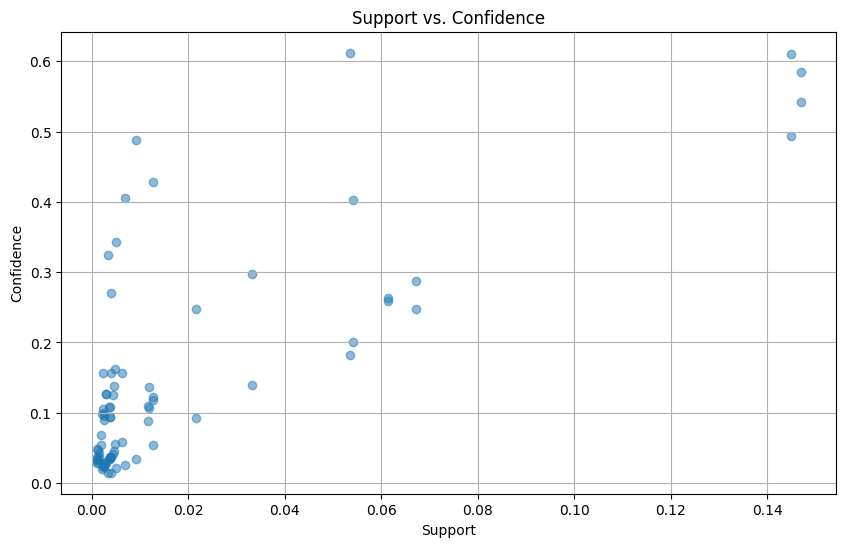

In [17]:


plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.grid()
plt.show()


Support vs Lift Scatter Plot

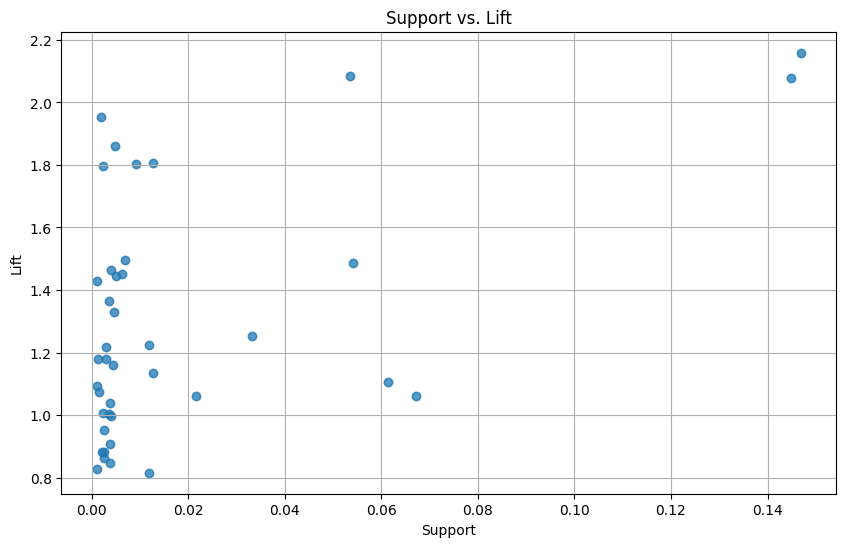

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs. Lift')
plt.grid()
plt.show()


Confidence vs. Lift Scatter Plot

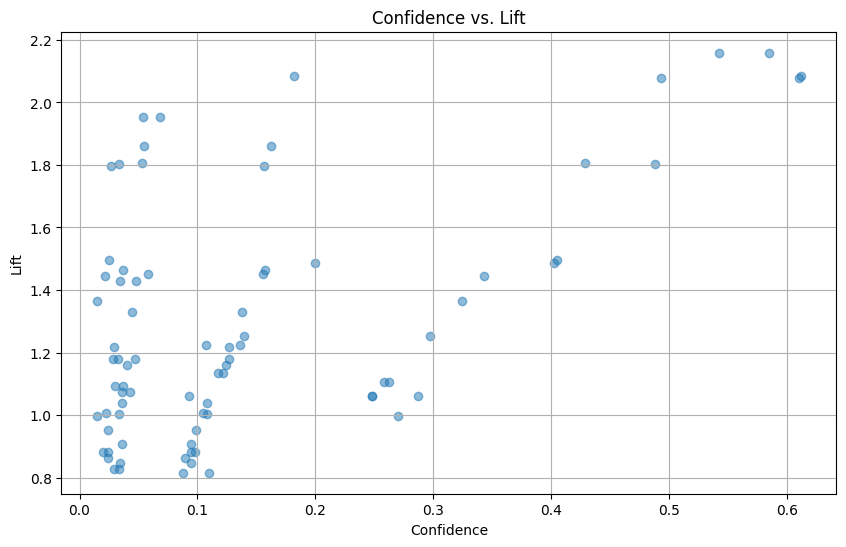

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.5)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence vs. Lift')
plt.grid()
plt.show()
